In [1442]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler 
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

from pandas import DataFrame,Series
from sklearn import tree
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
%matplotlib inline

In [1443]:
bed = pd.read_csv('bed.csv')
icu = pd.read_csv('icu.csv')
bed.head(2)

,County Name,Most Recent Date,Total Count Confirmed,Total Count Deaths,COVID-19 Positive Patients,Suspected COVID-19 Positive Patients,ICU COVID-19 Positive Patients,ICU COVID-19 Suspected Patients
0,Los Angeles,2020-04-01T00:00:00,3502.0,66.0,739.0,1332.0,335.0,220.0
1,San Bernardino,2020-04-01T00:00:00,245.0,5.0,95.0,196.0,39.0,52.0


In [1444]:
# bed.head(100)
# gk = bed.groupby('County Name') 
# gk = gk.last().reset_index()
# bed = gk

bed[bed["Total Count Deaths"] >100].shape

(40, 8)

In [1445]:
icu.head(3)

,countynum,State,County,ICU Beds,Total Population,Population Aged 60+,Percent of Population Aged 60+,Residents Aged 60+ Per Each ICU Bed
0,1,California,Alameda,282,1629615,300276,18.4,1065.0
1,2,California,Alpine,0,1203,429,35.7,NaN
2,3,California,Amador,6,37306,12967,34.8,2161.0


In [1446]:
comb = pd.merge(bed,icu, left_on="County Name", right_on="County")
del comb["County"]
comb.shape

(1565, 15)

In [1447]:
df =comb.drop(['County Name','Most Recent Date','State','Residents Aged 60+ Per Each ICU Bed'],axis=1)
X = df.drop("Total Count Deaths",axis=1)   #Feature Matrix
Y = df["Total Count Deaths"]          #Target Variable
df.head(2)
covidcases=df

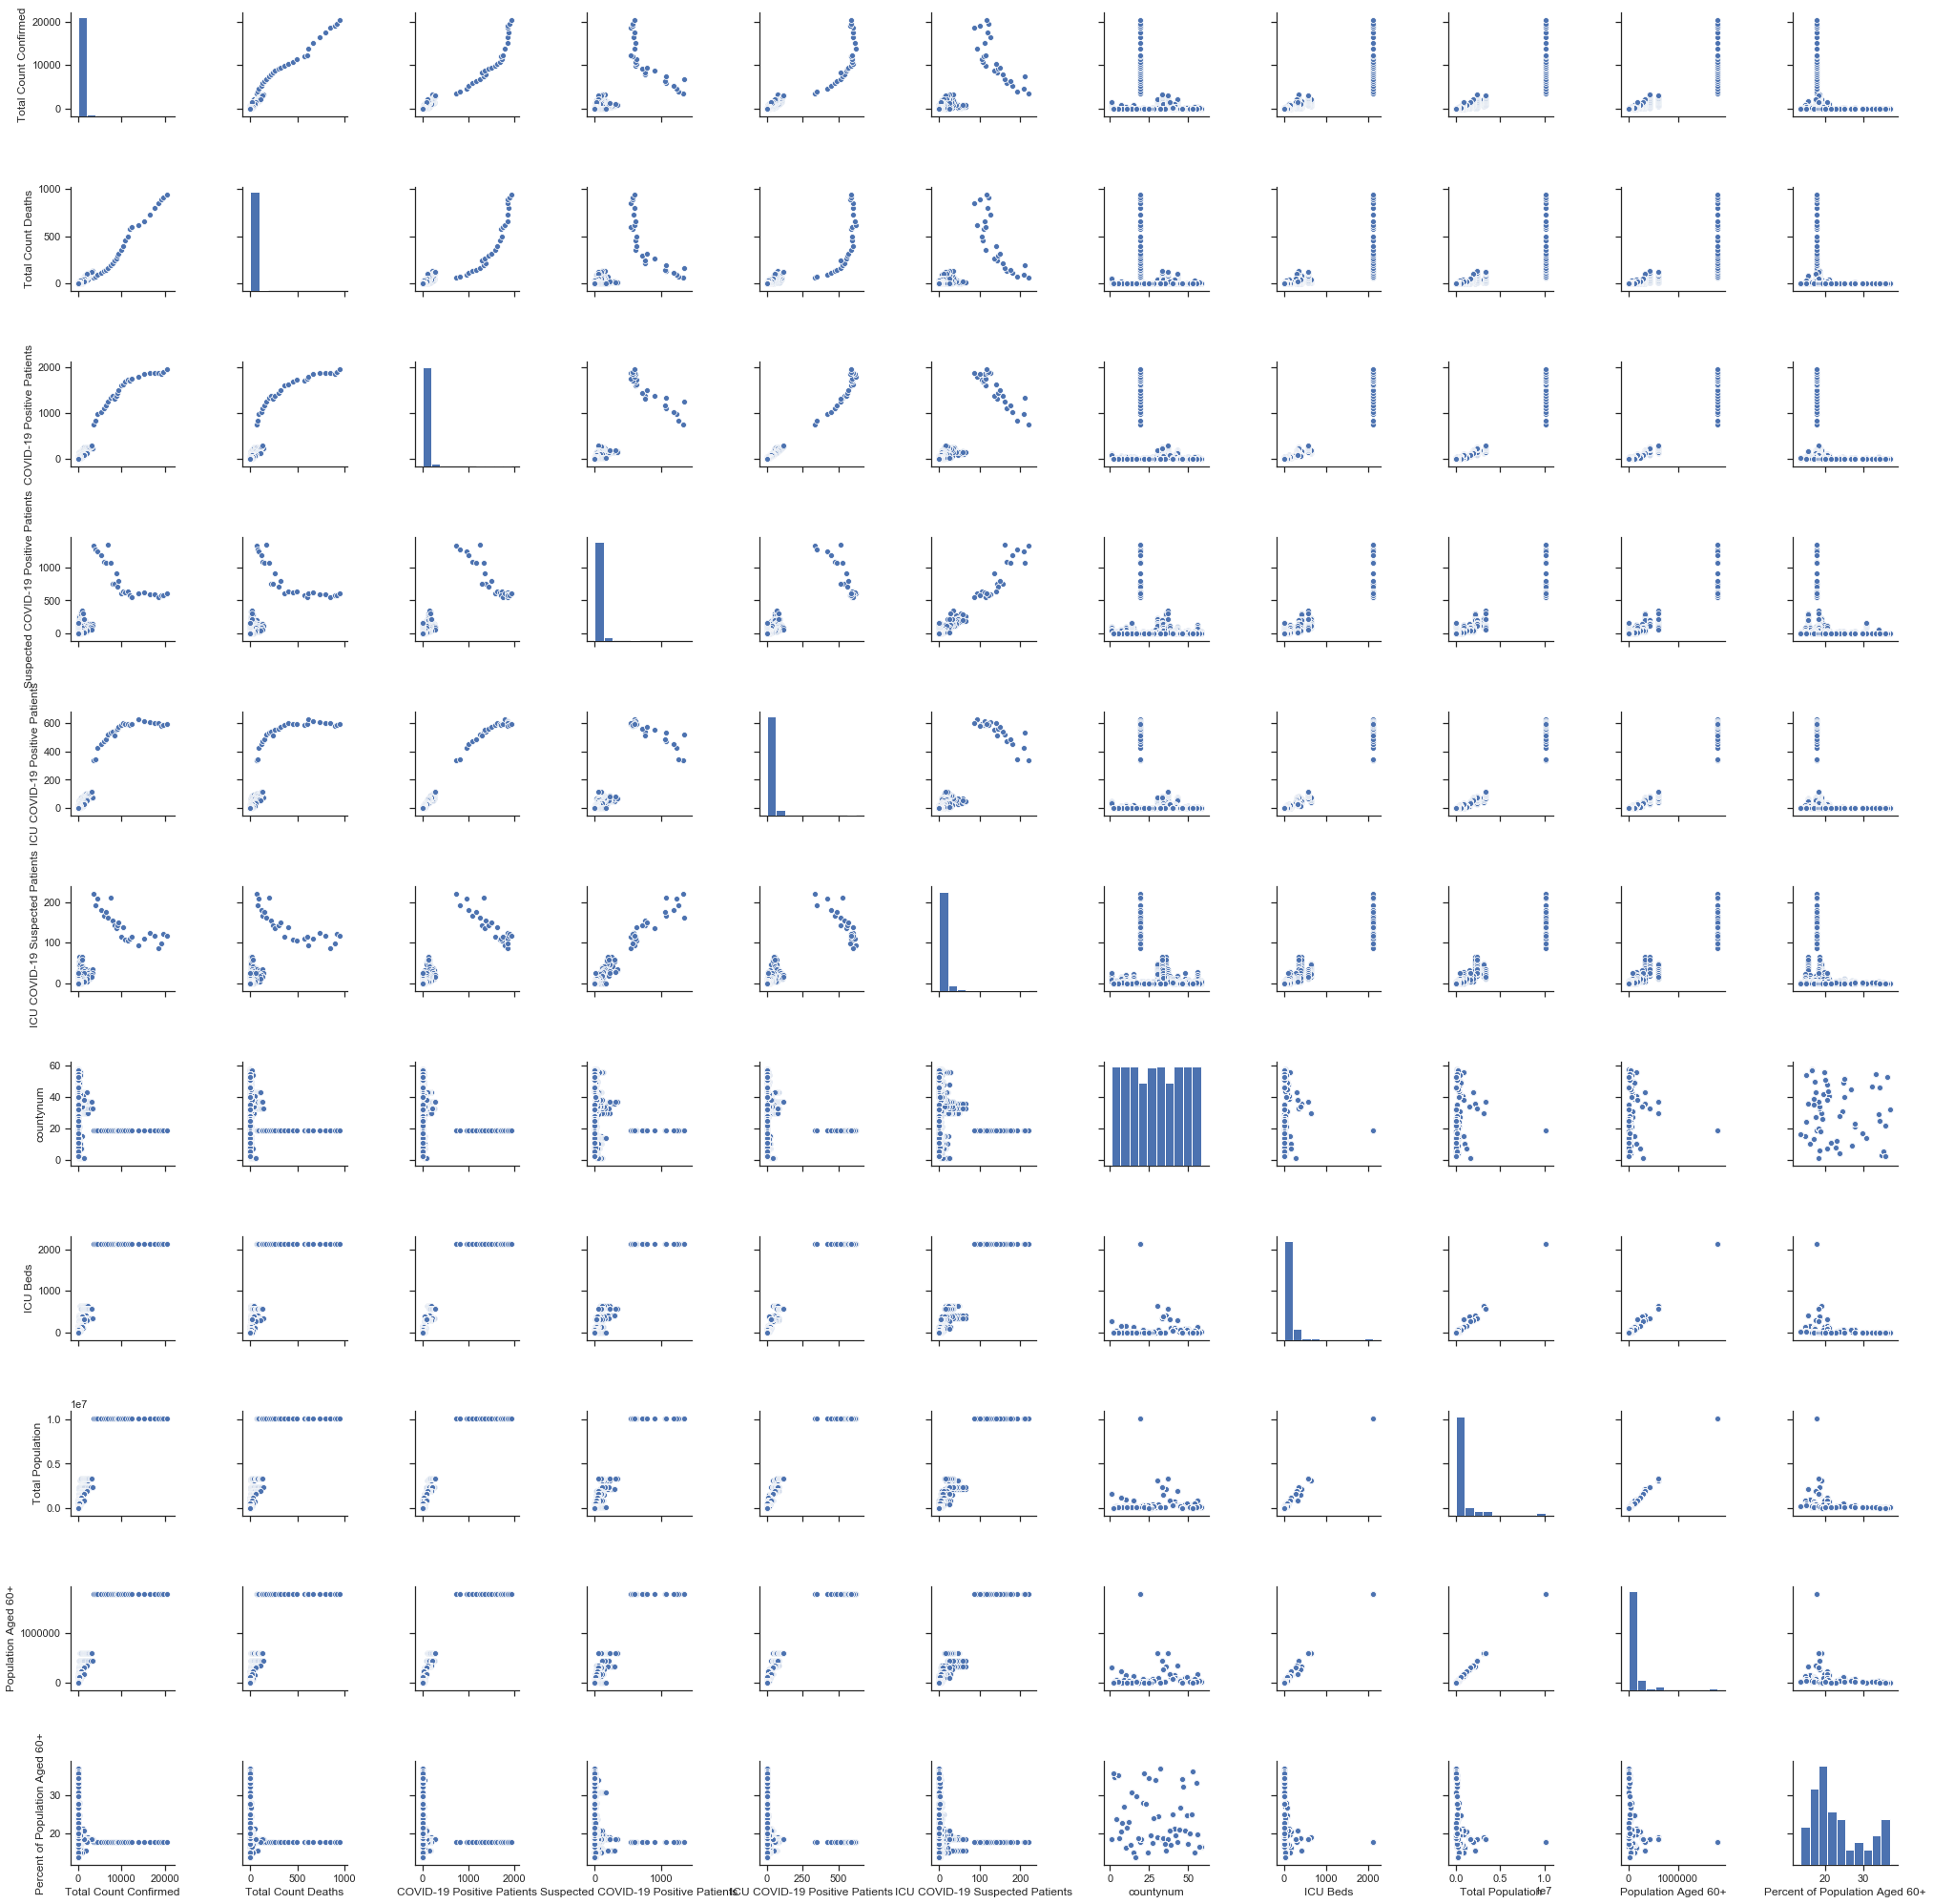

In [1448]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)    

g = sns.pairplot(df)
plt.show()

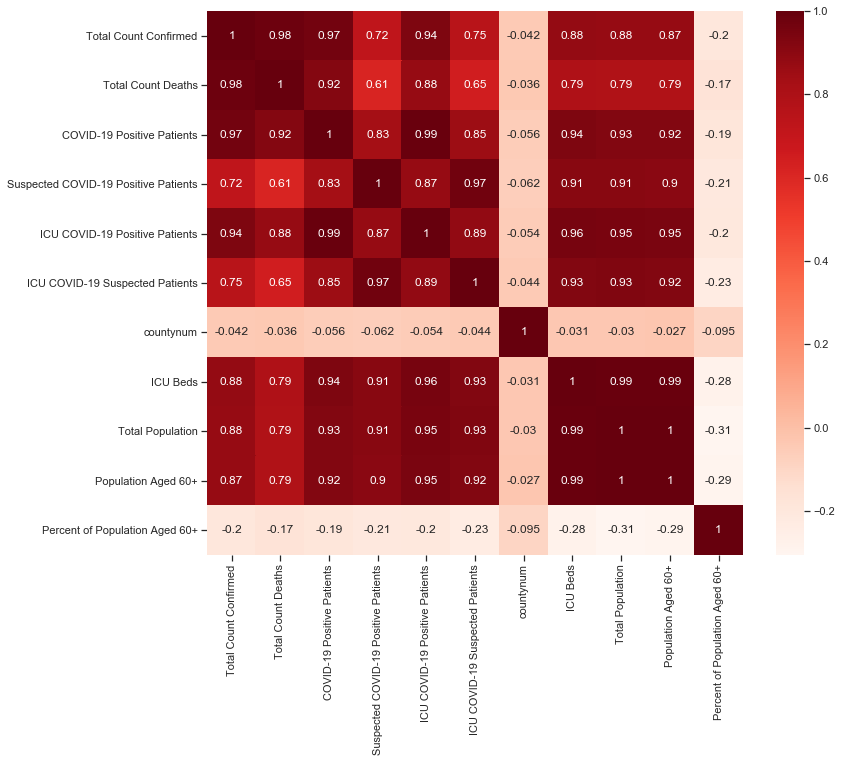

In [1449]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [1450]:
#Correlation with output variable
cor_target = abs(cor["Total Count Deaths"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Total Count Confirmed                   0.981631
Total Count Deaths                      1.000000
COVID-19 Positive Patients              0.920046
Suspected COVID-19 Positive Patients    0.613802
ICU COVID-19 Positive Patients          0.875670
ICU COVID-19 Suspected Patients         0.649056
ICU Beds                                0.791835
Total Population                        0.789718
Population Aged 60+                     0.786165
Name: Total Count Deaths, dtype: float64

In [1451]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [1452]:
cols = list(x.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 4)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
selected_features_rfe

In [1453]:
df.head(1)

,Total Count Confirmed,Total Count Deaths,COVID-19 Positive Patients,Suspected COVID-19 Positive Patients,ICU COVID-19 Positive Patients,ICU COVID-19 Suspected Patients,countynum,ICU Beds,Total Population,Population Aged 60+,Percent of Population Aged 60+
0,3502.0,66.0,739.0,1332.0,335.0,220.0,19,2126,10105722,1800341,17.8


In [1454]:
df=df.fillna(0)
x = df[['COVID-19 Positive Patients', 'Suspected COVID-19 Positive Patients',
       'ICU COVID-19 Suspected Patients', 'Percent of Population Aged 60+']]  #Feature Matrix
y = df["Total Count Deaths"]
y.head(3)


0    66.0
1    79.0
2    91.0
Name: Total Count Deaths, dtype: float64

In [1455]:
df.head(2)

,Total Count Confirmed,Total Count Deaths,COVID-19 Positive Patients,Suspected COVID-19 Positive Patients,ICU COVID-19 Positive Patients,ICU COVID-19 Suspected Patients,countynum,ICU Beds,Total Population,Population Aged 60+,Percent of Population Aged 60+
0,3502.0,66.0,739.0,1332.0,335.0,220.0,19,2126,10105722,1800341,17.8
1,4040.0,79.0,818.0,1270.0,346.0,193.0,19,2126,10105722,1800341,17.8


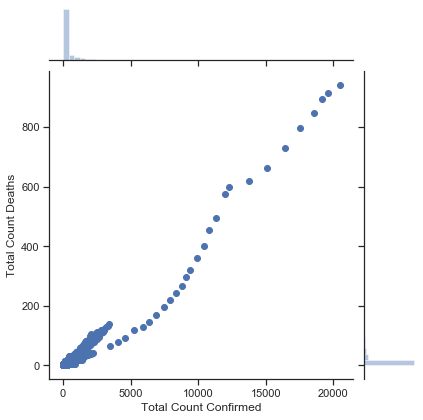

In [1456]:
sns.jointplot(x='Total Count Confirmed',y='Total Count Deaths',data=df)

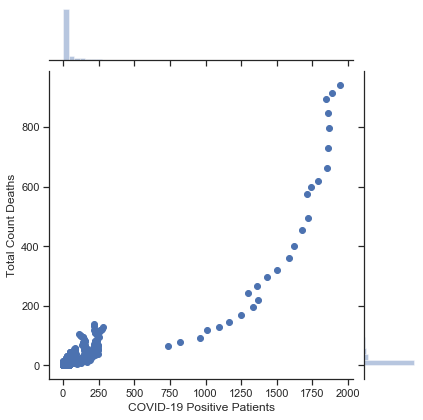

In [1457]:
sns.jointplot(x='COVID-19 Positive Patients',y='Total Count Deaths',data=df)

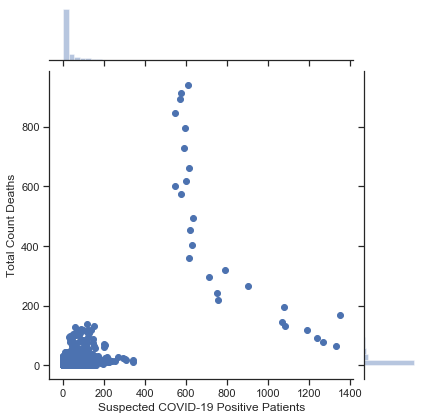

In [1458]:
sns.jointplot(x='Suspected COVID-19 Positive Patients',y='Total Count Deaths',data=df)

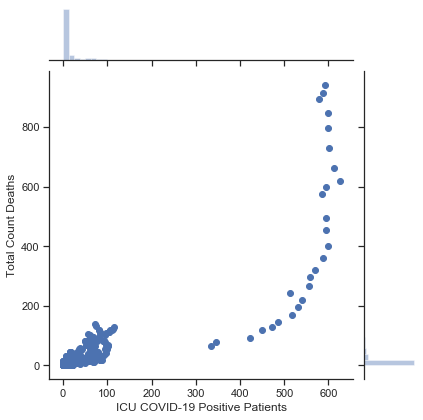

In [1459]:
 sns.jointplot(x='ICU COVID-19 Positive Patients',y='Total Count Deaths',data=df)

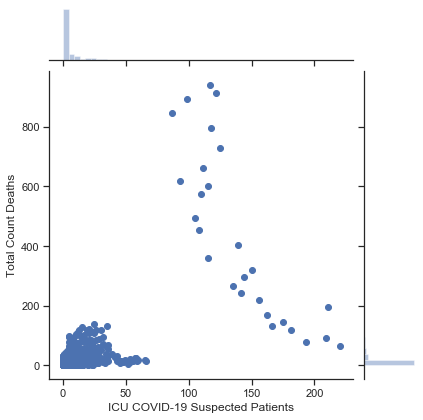

In [1460]:
 sns.jointplot(x='ICU COVID-19 Suspected Patients',y='Total Count Deaths',data=df)

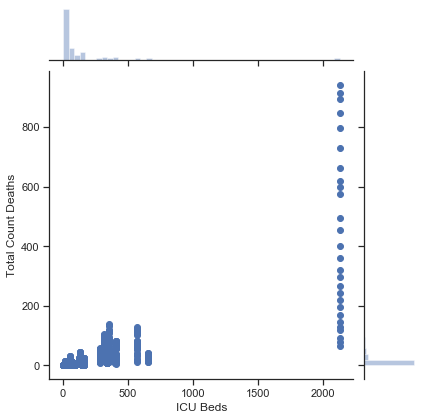

In [1461]:
 sns.jointplot(x='ICU Beds',y='Total Count Deaths',data=df)

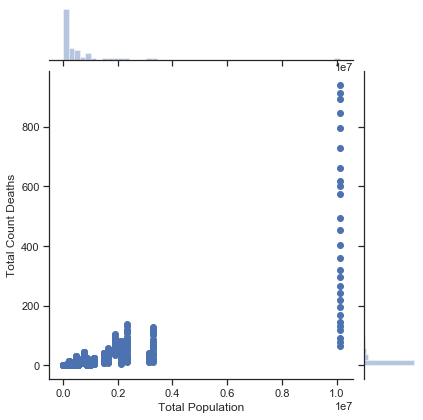

In [1462]:
 sns.jointplot(x='Total Population',y='Total Count Deaths',data=df)

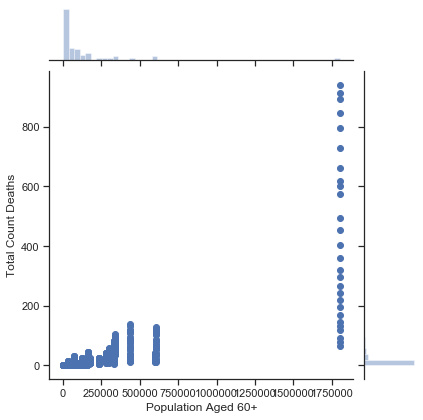

In [1463]:
sns.jointplot(x='Population Aged 60+',y='Total Count Deaths',data=df)

In [1464]:
x.head(2)

,COVID-19 Positive Patients,Suspected COVID-19 Positive Patients,ICU COVID-19 Suspected Patients,Percent of Population Aged 60+
0,739.0,1332.0,220.0,17.8
1,818.0,1270.0,193.0,17.8


In [1465]:
import numpy as np
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

[[1.89103    0.72952373 3.39094185 ... 6.47871193 6.44045233 0.79556222]
 [2.2243146  0.91823284 3.78047948 ... 6.47871193 6.44045233 0.79556222]
 [2.55016534 1.09242587 4.49052275 ... 6.47871193 6.44045233 0.79556222]
 ...
 [0.27841735 0.22853791 0.25296079 ... 0.45570907 0.47192497 1.66037159]
 [0.27841735 0.22853791 0.25296079 ... 0.45570907 0.47192497 1.66037159]
 [0.27841735 0.22853791 0.25296079 ... 0.45570907 0.47192497 1.66037159]]


In [1466]:
print(np.where(z > 2))

(array([   0,    0,    0,    0,    0,    0,    0,    1,    1,    1,    1,
          1,    1,    1,    1,    2,    2,    2,    2,    2,    2,    2,
          2,    3,    3,    3,    3,    3,    3,    3,    3,    4,    4,
          4,    4,    4,    4,    4,    4,    5,    5,    5,    5,    5,
          5,    5,    5,    6,    6,    6,    6,    6,    6,    6,    6,
          6,    7,    7,    7,    7,    7,    7,    7,    7,    7,    8,
          8,    8,    8,    8,    8,    8,    8,    8,    9,    9,    9,
          9,    9,    9,    9,    9,    9,   10,   10,   10,   10,   10,
         10,   10,   10,   10,   11,   11,   11,   11,   11,   11,   11,
         11,   11,   12,   12,   12,   12,   12,   12,   12,   12,   12,
         13,   13,   13,   13,   13,   13,   13,   13,   13,   14,   14,
         14,   14,   14,   14,   14,   14,   14,   15,   15,   15,   15,
         15,   15,   15,   15,   15,   16,   16,   16,   16,   16,   16,
         16,   16,   16,   17,   17,   17,   17,  

In [1467]:
df = df[(z < 2).all(axis=1)]

In [1468]:
df.describe()

,Total Count Confirmed,Total Count Deaths,COVID-19 Positive Patients,Suspected COVID-19 Positive Patients,ICU COVID-19 Positive Patients,ICU COVID-19 Suspected Patients,countynum,ICU Beds,Total Population,Population Aged 60+,Percent of Population Aged 60+
count,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1.494000e+03,1494.000000,1494.000000
mean,266.003347,8.533467,25.244311,21.789157,10.135207,4.121821,29.587684,89.281794,4.934287e+05,94206.849398,23.090964
std,509.730806,18.915185,50.575760,38.274020,20.343084,7.512964,17.072322,141.605317,7.308458e+05,133045.685994,6.594887
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.203000e+03,429.000000,13.700000
25%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,6.000000,4.505700e+04,12967.000000,18.400000
50%,39.000000,1.000000,2.000000,5.000000,1.000000,1.000000,29.000000,27.000000,1.799570e+05,34981.000000,20.700000
75%,222.750000,7.000000,25.000000,21.000000,10.000000,4.000000,45.000000,92.000000,5.356840e+05,123774.000000,27.800000
max,3381.000000,138.000000,277.000000,269.000000,115.000000,47.000000,58.000000,651.000000,3.283665e+06,604412.000000,36.300000


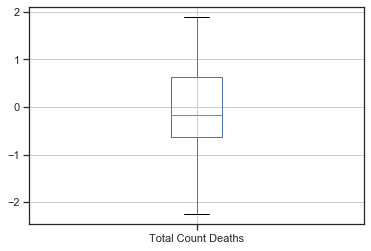

In [1469]:
np.random.seed(2000)
df = pd.DataFrame(np.random.randn(20,1),
                  columns=['Total Count Deaths'])
boxplot = df.boxplot(column=['Total Count Deaths'])

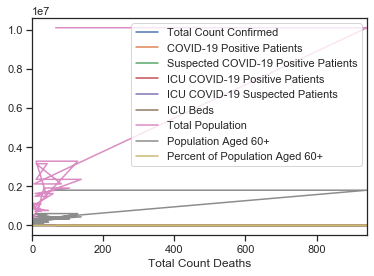

In [1470]:
comb.plot(x="Total Count Deaths", y=['Total Count Confirmed', 'COVID-19 Positive Patients',
       'Suspected COVID-19 Positive Patients',
       'ICU COVID-19 Positive Patients', 'ICU COVID-19 Suspected Patients',
       'ICU Beds', 'Total Population', 'Population Aged 60+',
       'Percent of Population Aged 60+'])

In [1471]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=42)

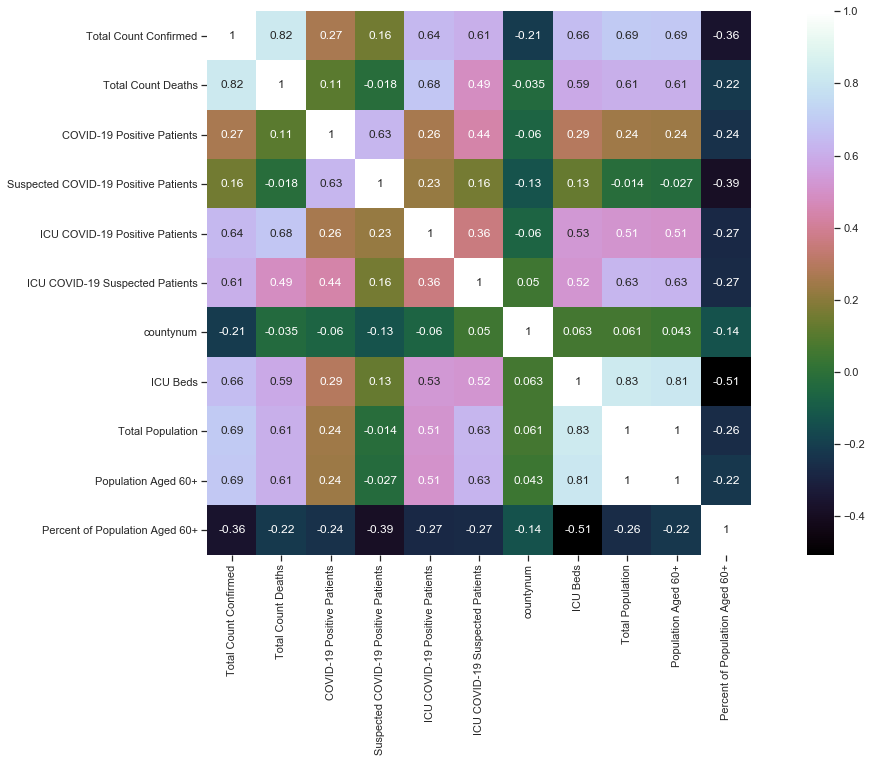

In [1472]:
import seaborn as sns
# GETTING Correllation matrix
corr_mat=X_train.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

In [1473]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x, y)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred
regressor.score(x_test, y_test)

0.9619048334038857

In [1474]:
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

161.56488414000057

In [1475]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 
  
# Train the model  
ridgeR = Ridge(alpha = 1) 
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test)

mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 
ridgeR.score(x_test, y_test)

390.9904378286894


0.907808890862294

In [1476]:
# import model 
from sklearn.linear_model import ElasticNet 
  
# Train the model 
e_net = ElasticNet(alpha = 1) 
e_net.fit(x_train, y_train) 
  
# calculate the prediction and mean square error 
y_pred = e_net.predict(x_test) 
e_net.score(x_test, y_test)

0.9081872089893155

In [1477]:
mse=mean_squared_error(y_test,y_pred)
mse

389.3859580528606

In [1478]:
from sklearn.linear_model import SGDClassifier

In [1479]:
clf = linear_model.Lasso(alpha=0.1, max_iter=10000)
clf.fit(x_train,y_train)
linear_model.Lasso(alpha=0.1)
y_pred = clf.predict(x_test)
clf.score(x_test, y_test)

0.9078600243757232

In [1480]:
mse=mean_squared_error(y_test,y_pred)
mse

390.77357619213467

In [1481]:
huber = linear_model.HuberRegressor().fit(x_train, y_train)
huber.fit(x_train,y_train)
y_pred = huber.predict(x_test)
huber.score(x_test, y_test)

0.8759342603295015

In [1482]:
mse=mean_squared_error(y_test,y_pred)
mse

526.1734925094693

In [1483]:
# Case prediction :

In [1484]:
covidcases1 = covidcases[covidcases['Percent of Population Aged 60+']>30]

In [1485]:
x = covidcases1
y = covidcases1["Total Count Deaths"]

#x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.50, random_state=42)

In [1486]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x, y)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred
regressor.score(x_test, y_test)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [1488]:
import plotly.figure_factory as ff
import numpy as np
import pandas as pd

df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
df_sample_r = df_sample[df_sample['STNAME'] == 'California']

values = df_sample_r['TOT_POP'].tolist()
fips = df_sample_r['FIPS'].tolist()

colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)'
]

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['CA', 'AZ', 'Nevada', 'Oregon', ' Idaho'],
    binning_endpoints=[14348, 63983, 134827, 426762, 2081313], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='Population by County', title='California and Nearby States'
)
fig.layout.template = None
fig.show()

ValueError: 
The create_choropleth figure factory requires the plotly-geo package.
Install using pip with:

$ pip install plotly-geo

Or, install using conda with

$ conda install -c plotly plotly-geo
